In [1]:
#Quora question pair similarities

In [3]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

In [4]:
df = pd.read_csv('train.csv', nrows=1000)

In [5]:
df.isnull().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

In [6]:
ques1_na_index = df[df.question1.isnull()].index
ques2_na_index = df[df.question2.isnull()].index
missing_questions = ques1_na_index.append(ques2_na_index)
df.loc[missing_questions]

,id,qid1,qid2,question1,question2,is_duplicate


In [7]:
df.fillna(' ', inplace=True)
df.isnull().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
id              1000 non-null int64
qid1            1000 non-null int64
qid2            1000 non-null int64
question1       1000 non-null object
question2       1000 non-null object
is_duplicate    1000 non-null int64
dtypes: int64(4), object(2)
memory usage: 47.0+ KB


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,1000.0,499.500,288.819436,0.0,249.75,499.5,749.25,999.0
qid1,1000.0,995.794,575.681665,1.0,498.50,995.0,1493.50,1993.0
qid2,1000.0,996.743,576.523005,2.0,497.50,998.0,1494.50,1994.0
is_duplicate,1000.0,0.380,0.485629,0.0,0.00,0.0,1.00,1.0


In [10]:
df.question1.describe()

count                    1000
unique                    999
top       Why do Slavs squat?
freq                        2
Name: question1, dtype: object

In [11]:
df.question2.describe()

count                                     1000
unique                                     997
top       How do I make money through YouTube?
freq                                         2
Name: question2, dtype: object

In [12]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [13]:
#null accuracy
df.is_duplicate.value_counts(normalize=True)

0    0.62
1    0.38
Name: is_duplicate, dtype: float64

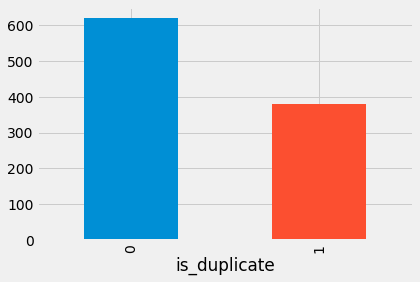

In [14]:
#Target distribution
df.groupby('is_duplicate')['id'].count().plot.bar()

In [15]:
#question statistics
qids = pd.Series(list(df.qid1) + list(df.qid2))
num_unique_ques     = len(qids.unique())
num_non_unique_ques = np.sum(qids.value_counts() > 1)
max_repeat = np.max(qids.value_counts())

In [16]:
num_unique_ques, num_non_unique_ques, max_repeat

(1994, 6, 2)

In [17]:
# df[['qid1','qid2','is_duplicate']].groupby(['qid1','qid2']).count()
qids.astype(str).describe()

count     2000
unique    1994
top        883
freq         2
dtype: object

In [18]:
#repeated question
df[df.qid1 == 2559].question1.unique()

array([], dtype=object)

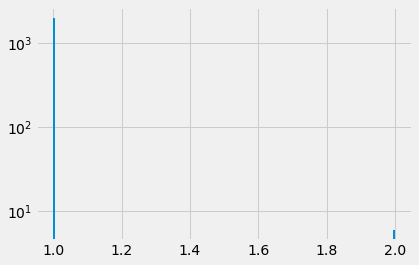

In [19]:
plt.hist(qids.value_counts(), bins=160)
plt.yscale('log', nonposy='clip')

In [20]:
df['freq_qid1'] = df.groupby('qid1')['qid1'].transform('count') 
df['freq_qid2'] = df.groupby('qid2')['qid2'].transform('count')
df['q1len'] = df['question1'].str.len() 
df['q2len'] = df['question2'].str.len()
df['q1_n_words'] = df['question1'].apply(lambda row: len(row.split(" ")))
df['q2_n_words'] = df['question2'].apply(lambda row: len(row.split(" ")))

df['word_Common'] = df[['question1', 'question2']].apply(lambda q: len(set(q[0].strip().split(" ")).intersection(set(q[1].strip().split(" ")))), axis=1)
df['word_Total'] = df[['question1', 'question2']].apply(lambda q: len(set(q[0].strip().split(" "))) + len(set(q[1].strip().split(" "))), axis=1)

df['word_share'] = df['word_Common']/df['word_Total'] 
df['freq_q1+q2'] = df['freq_qid1']+df['freq_qid2']
df['freq_q1-q2'] = abs(df['freq_qid1']-df['freq_qid2'])

df.head()

# word_Common = (Number of common unique words in Question 1 and Question 2)

# document_1_text = 'This is document one'
# document_2_text = 'This is document two'

# set(document_1_text.split(" ")).symmetric_difference((set(document_2_text.split(" "))))
# set(document_1_text.split(" ")).intersection((set(document_2_text.split(" "))))
# df[['question1', 'question2']].apply(lambda q: set(q[0].split(" ")).intersection((set(q[1].split(" ")))), axis=1)

# df[['question1', 'question2']].apply(lambda q: set(q[0].split(" "))..intersection((set(q[1].split(" ")))), axis=1)
    
# print(set(document_1_text.split(" ")).intersection(set(document_2_text.split(" "))))
# print(set(document_1_text.split(" ")).union(set(document_2_text.split(" "))))






,id,qid1,qid2,question1,question2,is_duplicate,freq_qid1,freq_qid2,q1len,q2len,q1_n_words,q2_n_words,word_Common,word_Total,word_share,freq_q1+q2,freq_q1-q2
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,1,1,66,57,14,12,10,23,0.434783,2,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,1,1,51,88,8,13,4,20,0.200000,2,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,1,1,73,59,14,10,3,24,0.125000,2,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,1,1,50,65,11,9,0,19,0.000000,2,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,1,1,76,39,13,7,2,20,0.100000,2,0


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
id              1000 non-null int64
qid1            1000 non-null int64
qid2            1000 non-null int64
question1       1000 non-null object
question2       1000 non-null object
is_duplicate    1000 non-null int64
freq_qid1       1000 non-null int64
freq_qid2       1000 non-null int64
q1len           1000 non-null int64
q2len           1000 non-null int64
q1_n_words      1000 non-null int64
q2_n_words      1000 non-null int64
word_Common     1000 non-null int64
word_Total      1000 non-null int64
word_share      1000 non-null float64
freq_q1+q2      1000 non-null int64
freq_q1-q2      1000 non-null int64
dtypes: float64(1), int64(14), object(2)
memory usage: 132.9+ KB


In [22]:
df.corr()

,id,qid1,qid2,is_duplicate,freq_qid1,freq_qid2,q1len,q2len,q1_n_words,q2_n_words,word_Common,word_Total,word_share,freq_q1+q2,freq_q1-q2
id,1.000000,0.999137,0.999022,0.010455,-0.053888,-0.044318,0.006653,-0.011122,-0.001449,-0.014868,-0.000557,-0.002236,0.013705,-0.065445,-0.065445
qid1,0.999137,1.000000,0.998157,0.009375,-0.071172,-0.044103,0.008299,-0.009606,0.000218,-0.013425,-0.000344,-0.000435,0.013223,-0.073926,-0.073926
qid2,0.999022,0.998157,1.000000,0.007650,-0.053701,-0.072863,0.006989,-0.010625,-0.000987,-0.014479,-0.000915,-0.001931,0.013017,-0.090096,-0.090096
is_duplicate,0.010455,0.009375,0.007650,1.000000,-0.035047,0.099240,-0.177177,-0.195426,-0.153338,-0.184193,0.250752,-0.188531,0.379830,0.068455,0.068455
freq_qid1,-0.053888,-0.071172,-0.053701,-0.035047,1.000000,-0.003478,-0.060024,-0.044778,-0.056622,-0.042870,-0.063802,-0.059925,-0.073009,0.498495,0.498495
freq_qid2,-0.044318,-0.044103,-0.072863,0.099240,-0.003478,1.000000,-0.031868,-0.027275,-0.029608,-0.022986,0.029712,-0.025936,0.054767,0.865154,0.865154
q1len,0.006653,0.008299,0.006989,-0.177177,-0.060024,-0.031868,1.000000,0.521262,0.954746,0.506713,0.286242,0.825670,-0.161240,-0.057729,-0.057729
q2len,-0.011122,-0.009606,-0.010625,-0.195426,-0.044778,-0.027275,0.521262,1.000000,0.491988,0.960891,0.249557,0.839675,-0.189091,-0.046101,-0.046101
q1_n_words,-0.001449,0.000218,-0.000987,-0.153338,-0.056622,-0.029608,0.954746,0.491988,1.000000,0.522980,0.307951,0.853963,-0.150336,-0.054063,-0.054063
q2_n_words,-0.014868,-0.013425,-0.014479,-0.184193,-0.042870,-0.022986,0.506713,0.960891,0.522980,1.000000,0.265678,0.873304,-0.185822,-0.041426,-0.041426


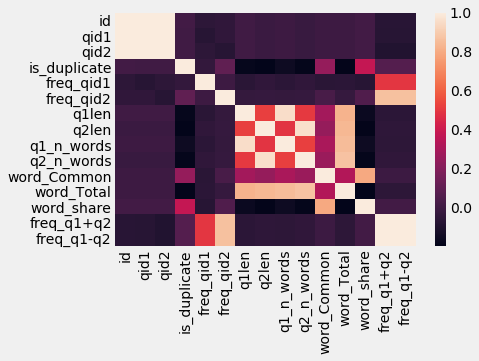

In [23]:
sns.heatmap(df.corr())

In [24]:
#fields correlated with independent variable is_duplicate: freq_qid1, freq_quid2, word_common, word_share, freq_q1+q2, freq_q1-q2
#There is also a very strong corelation between dependent variables freq_qid1 with freq_qid2, freq_q1+q2, freq_q1-q2; 
#word_total with q1len, q2len, q1_n_words, q2_n_words;
#word_common with word_share

In [25]:
df.corr()["is_duplicate"]

id              0.010455
qid1            0.009375
qid2            0.007650
is_duplicate    1.000000
freq_qid1      -0.035047
freq_qid2       0.099240
q1len          -0.177177
q2len          -0.195426
q1_n_words     -0.153338
q2_n_words     -0.184193
word_Common     0.250752
word_Total     -0.188531
word_share      0.379830
freq_q1+q2      0.068455
freq_q1-q2      0.068455
Name: is_duplicate, dtype: float64

In [26]:
df.corr()["is_duplicate"].abs() > .2

id              False
qid1            False
qid2            False
is_duplicate     True
freq_qid1       False
freq_qid2       False
q1len           False
q2len           False
q1_n_words      False
q2_n_words      False
word_Common      True
word_Total      False
word_share       True
freq_q1+q2      False
freq_q1-q2      False
Name: is_duplicate, dtype: bool

In [27]:
#columns with high predictive power
cols = list(df.corr()["is_duplicate"].abs() > .2)
cols[3:3] = [True, True] #insert question1, question2 excluded by corr function
highly_correlated_features = df.columns[cols]
highly_correlated_features = highly_correlated_features.drop('is_duplicate')
highly_correlated_features

Index(['question1', 'question2', 'word_Common', 'word_share'], dtype='object')

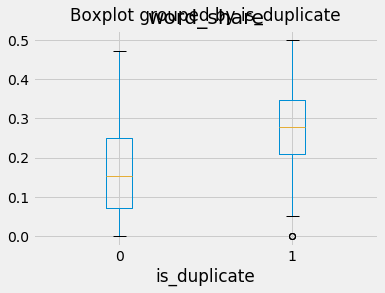

In [28]:
df.boxplot(column="word_share", by = "is_duplicate")

In [29]:
#approx. 28% words shared between duplicate questions

In [30]:
'''
Todo:
run logistic regression on both min feature and full featured dataset and benchmark result 
**after tfidf transformation
'''


'\nTodo:\nrun logistic regression on both min feature and full featured dataset and benchmark result \n**after tfidf transformation\n'

In [31]:
#More feature extraction

In [32]:
import re
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from bs4 import BeautifulSoup
from fuzzywuzzy import fuzz
import distance
from sklearn.feature_extraction.text import TfidfVectorizer

In [33]:
def preprocess_text(x):
    x = str(x).lower()
    x = x.replace(",000,000", "m").replace(",000", "k").replace("′", "'").replace("’", "'")\
                           .replace("won't", "will not").replace("cannot", "can not").replace("can't", "can not")\
                           .replace("n't", " not").replace("what's", "what is").replace("it's", "it is")\
                           .replace("'ve", " have").replace("i'm", "i am").replace("'re", " are")\
                           .replace("he's", "he is").replace("she's", "she is").replace("'s", " own")\
                           .replace("%", " percent ").replace("₹", " rupee ").replace("$", " dollar ")\
                           .replace("€", " euro ").replace("'ll", " will")
    x = re.sub(r"([0-9]+)000000", r"\1m", x)
    x = re.sub(r"([0-9]+)000", r"\1k", x)
    
    porter = PorterStemmer()
    pattern = re.compile('\W')
    
    if type(x) == type(''):
        x = re.sub(pattern, ' ', x)
    
    
    if type(x) == type(''):
        x = porter.stem(x)
        example1 = BeautifulSoup(x)
        x = example1.get_text()
               
    return x.strip()

In [34]:
#text preprocessing
# df.question1 = df.question1.apply(preprocess_text)
# df.question2 = df.question2.apply(preprocess_text)

In [35]:
SAFE_DIV = 0.0001 
STOP_WORDS = stopwords.words("english")

def get_token_features(q1, q2):
    token_features = [0.0]*10
    
    # Converting the Sentence into Tokens: 
    q1_tokens = q1.split()
    q2_tokens = q2.split()

    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return token_features
    # Get the non-stopwords in Questions
    q1_words = set([word for word in q1_tokens if word not in STOP_WORDS])
    q2_words = set([word for word in q2_tokens if word not in STOP_WORDS])
    
    #Get the stopwords in Questions
    q1_stops = set([word for word in q1_tokens if word in STOP_WORDS])
    q2_stops = set([word for word in q2_tokens if word in STOP_WORDS])
    
    # Get the common non-stopwords from Question pair
    common_word_count = len(q1_words.intersection(q2_words))
    
    # Get the common stopwords from Question pair
    common_stop_count = len(q1_stops.intersection(q2_stops))
    
    # Get the common Tokens from Question pair
    common_token_count = len(set(q1_tokens).intersection(set(q2_tokens)))
    
    
    token_features[0] = common_word_count / (min(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[1] = common_word_count / (max(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[2] = common_stop_count / (min(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[3] = common_stop_count / (max(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[4] = common_token_count / (min(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    token_features[5] = common_token_count / (max(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    
    # Last word of both question is same or not
    token_features[6] = int(q1_tokens[-1] == q2_tokens[-1])
    
    # First word of both question is same or not
    token_features[7] = int(q1_tokens[0] == q2_tokens[0])
    
    token_features[8] = abs(len(q1_tokens) - len(q2_tokens))
    
    #Average Token Length of both Questions
    token_features[9] = (len(q1_tokens) + len(q2_tokens))/2
    return token_features

# get the Longest Common sub string

def get_longest_substr_ratio(a, b):
    strs = list(distance.lcsubstrings(a, b))
    if len(strs) == 0:
        return 0
    else:
        return len(strs[0]) / (min(len(a), len(b)) + 1)

def extract_features(df):
    # preprocessing each question
    df["question1"] = df["question1"].apply(preprocess_text)
    df["question2"] = df["question2"].apply(preprocess_text)

    print("token features...")
    
    # Merging Features with dataset
    
    token_features = df.apply(lambda x: get_token_features(x["question1"], x["question2"]), axis=1)
    
    df["cwc_min"]       = list(map(lambda x: x[0], token_features))
    df["cwc_max"]       = list(map(lambda x: x[1], token_features))
    df["csc_min"]       = list(map(lambda x: x[2], token_features))
    df["csc_max"]       = list(map(lambda x: x[3], token_features))
    df["ctc_min"]       = list(map(lambda x: x[4], token_features))
    df["ctc_max"]       = list(map(lambda x: x[5], token_features))
    df["last_word_eq"]  = list(map(lambda x: x[6], token_features))
    df["first_word_eq"] = list(map(lambda x: x[7], token_features))
    df["abs_len_diff"]  = list(map(lambda x: x[8], token_features))
    df["mean_len"]      = list(map(lambda x: x[9], token_features))
   
    #Computing Fuzzy Features and Merging with Dataset
    
    # do read this blog: http://chairnerd.seatgeek.com/fuzzywuzzy-fuzzy-string-matching-in-python/
    # https://stackoverflow.com/questions/31806695/when-to-use-which-fuzz-function-to-compare-2-strings
    # https://github.com/seatgeek/fuzzywuzzy
    print("fuzzy features..")

    df["token_set_ratio"]       = df.apply(lambda x: fuzz.token_set_ratio(x["question1"], x["question2"]), axis=1)
    # The token sort approach involves tokenizing the string in question, sorting the tokens alphabetically, and 
    # then joining them back into a string We then compare the transformed strings with a simple ratio().
    df["token_sort_ratio"]      = df.apply(lambda x: fuzz.token_sort_ratio(x["question1"], x["question2"]), axis=1)
    df["fuzz_ratio"]            = df.apply(lambda x: fuzz.QRatio(x["question1"], x["question2"]), axis=1)
    df["fuzz_partial_ratio"]    = df.apply(lambda x: fuzz.partial_ratio(x["question1"], x["question2"]), axis=1)
    df["longest_substr_ratio"]  = df.apply(lambda x: get_longest_substr_ratio(x["question1"], x["question2"]), axis=1)
    return df

In [36]:
%%time
df = extract_features(df)

token features...
fuzzy features..
Wall time: 5.54 s


In [37]:

df.head()
# Todo: concat old and new features

,id,qid1,qid2,question1,question2,is_duplicate,freq_qid1,freq_qid2,q1len,q2len,...,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,token_set_ratio,token_sort_ratio,fuzz_ratio,fuzz_partial_ratio,longest_substr_ratio
0,0,1,2,what is the step by step guide to invest in sh...,what is the step by step guide to invest in sh...,0,1,1,66,57,...,0.785709,0,1,2,13.0,100,93,93,100,0.982456
1,1,3,4,what is the story of kohinoor koh i noor dia...,what would happen if the indian government sto...,0,1,1,51,88,...,0.466664,0,1,5,12.5,86,63,66,74,0.588235
2,2,5,6,how can i increase the speed of my internet co...,how can internet speed be increased by hacking...,0,1,1,73,59,...,0.285712,0,1,4,12.0,63,63,43,46,0.169492
3,3,7,8,why am i mentally very lonely how can i solve it,find the remainder when math 23 24 math i...,0,1,1,50,65,...,0.000000,0,0,2,12.0,28,24,9,11,0.040000
4,4,9,10,which one dissolve in water quikly sugar salt...,which fish would survive in salt water,0,1,1,76,39,...,0.307690,0,1,6,10.0,67,47,35,55,0.153846


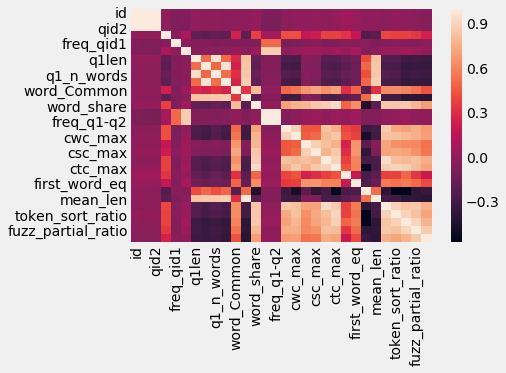

In [38]:
sns.heatmap(df.corr())

In [39]:
cols = list(df.corr()["is_duplicate"].abs() > .2)
highly_correlated_features = df.drop(['question1', 'question2'], axis=1).columns[cols]
highly_correlated_features = highly_correlated_features.drop('is_duplicate')
highly_correlated_features

Index(['word_Common', 'word_share', 'cwc_min', 'cwc_max', 'csc_max', 'ctc_min',
       'ctc_max', 'last_word_eq', 'abs_len_diff', 'mean_len',
       'token_set_ratio', 'token_sort_ratio', 'fuzz_ratio',
       'fuzz_partial_ratio', 'longest_substr_ratio'],
      dtype='object')

In [40]:
%%time
#vectorize question text
questions = list(df['question1']) + list(df['question2'])

tfidf = TfidfVectorizer(lowercase=False, analyzer='word', stop_words='english', max_features=2000)
tfidf.fit(questions)


Wall time: 197 ms


In [41]:
len(tfidf.get_feature_names())

2000

In [42]:
q1_tfidf = tfidf.transform(df['question1'])
q2_tfidf = tfidf.transform(df['question2'])

In [43]:
q1_df = pd.DataFrame(list(q1_tfidf.toarray()))
q2_df = pd.DataFrame(list(q2_tfidf.toarray()))
q1_df.columns = [name + "_x" for name in tfidf.get_feature_names()]
q2_df.columns = [name + "_y" for name in tfidf.get_feature_names()]

In [44]:
df_ques = pd.concat([q1_df, q2_df], axis=1)

In [45]:
df_final = pd.concat([df[highly_correlated_features], df_ques], axis=1)

In [46]:
df_final.shape

(1000, 4015)

In [47]:
df_final.head()

,word_Common,word_share,cwc_min,cwc_max,csc_max,ctc_min,ctc_max,last_word_eq,abs_len_diff,mean_len,...,written_y,wrong_y,year_y,years_y,yes_y,younger_y,youtube_y,zealand_y,zero_y,zika_y
0,10,0.434783,0.999980,0.833319,0.999983,0.916659,0.785709,0,2,13.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4,0.200000,0.799984,0.399996,0.599988,0.699993,0.466664,0,5,12.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,0.125000,0.399992,0.333328,0.249997,0.399996,0.285712,0,4,12.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,2,12.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2,0.100000,0.399992,0.199998,0.666644,0.571420,0.307690,0,6,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [48]:
#model building

In [50]:
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import confusion_matrix
from sklearn.grid_search import RandomizedSearchCV

In [60]:
# This function plots the confusion matrices given y_i, y_i_hat.
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    # C = 9,9 matrix, each cell (i,j) represents number of points of class i are predicted class j
    
    A =(((C.T)/(C.sum(axis=1))).T)
    #divid each element of the confusion matrix with the sum of elements in that column
    
    # C = [[1, 2],
    #     [3, 4]]
    # C.T = [[1, 3],
    #        [2, 4]]
    # C.sum(axis = 1)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =1) = [[3, 7]]
    # ((C.T)/(C.sum(axis=1))) = [[1/3, 3/7]
    #                           [2/3, 4/7]]

    # ((C.T)/(C.sum(axis=1))).T = [[1/3, 2/3]
    #                           [3/7, 4/7]]
    # sum of row elements = 1
    
    B =(C/C.sum(axis=0))
    #divid each element of the confusion matrix with the sum of elements in that row
    # C = [[1, 2],
    #     [3, 4]]
    # C.sum(axis = 0)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =0) = [[4, 6]]
    # (C/C.sum(axis=0)) = [[1/4, 2/6],
    #                      [3/4, 4/6]] 
    plt.figure(figsize=(20,4))
    
    labels = [1,2]
    # representing A in heatmap format
    cmap=sns.light_palette("blue")
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    
    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")
    
    plt.subplot(1, 3, 3)
    # representing B in heatmap format
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")
    
    plt.show()

In [57]:
%%time
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

random_search = RandomizedSearchCV(estimator = xgb.XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=5,
                                                             min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
                                                             objective= 'binary:logistic', nthread=-1, scale_pos_weight=1, seed=27), 
                                   param_distributions = params, scoring='roc_auc', iid=False, cv=5, n_iter=3)
random_search.fit(df_final, df.is_duplicate)

Wall time: 56.5 s


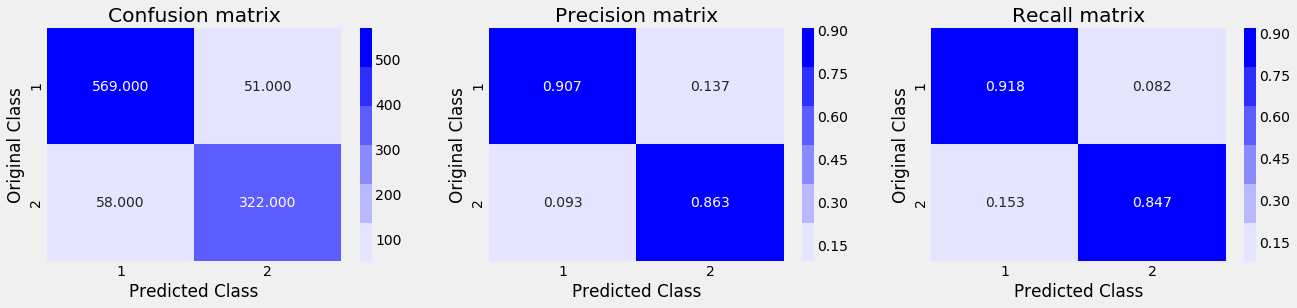

In [61]:
predict_y = random_search.best_estimator_.predict(df_final)
predict_proba = random_search.best_estimator_.predict_proba(df_final)
plot_confusion_matrix(df.is_duplicate, predict_y)